In [16]:
import requests
from io import BytesIO
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
page=1
url="https://finance.naver.com/sise/investorDealTrendDay.naver?bizdate=20231117&sosok=&page={}".format(page)
resp=requests.get(url)
html=BytesIO(resp.content)
html

In [5]:
df=pd.read_html(html)[0]

In [6]:
columns=df.columns

In [7]:
columns

MultiIndex([(  '날짜',      '날짜'),
            (  '개인',      '개인'),
            ( '외국인',     '외국인'),
            ( '기관계',     '기관계'),
            (  '기관',    '금융투자'),
            (  '기관',      '보험'),
            (  '기관', '투신 (사모)'),
            (  '기관',      '은행'),
            (  '기관',  '기타금융기관'),
            (  '기관',    '연기금등'),
            ('기타법인',    '기타법인')],
           )

In [8]:
df=pd.DataFrame(columns=columns)
df

Empty DataFrame
Columns: [(날짜, 날짜), (개인, 개인), (외국인, 외국인), (기관계, 기관계), (기관, 금융투자), (기관, 보험), (기관, 투신 (사모)), (기관, 은행), (기관, 기타금융기관), (기관, 연기금등), (기타법인, 기타법인)]
Index: []

In [13]:
for page in tqdm(range(1, 381)):
    url="https://finance.naver.com/sise/investorDealTrendDay.naver?bizdate=20231117&sosok=&page={}".format(page)
    resp=requests.get(url)
    html=BytesIO(resp.content)
    df_data=pd.read_html(html)[0].dropna()
    df=pd.concat([df,df_data])
    
df

100%|████████████████████████████████████████████████████████████████████████████████| 380/380 [01:24<00:00,  4.49it/s]


날짜       개인     외국인      기관계       기관                                \
          날짜       개인     외국인      기관계     금융투자      보험 투신 (사모)     은행 기타금융기관   
0        NaN      NaN     NaN      NaN      NaN     NaN     NaN    NaN    NaN   
1   23.11.17   2930.0  -730.0  -2412.0   -817.0  -141.0 -1296.0   33.0    1.0   
2   23.11.16  -3927.0  4560.0   -620.0  -1612.0   119.0   242.0    5.0   22.0   
3   23.11.15 -16154.0  5495.0  10916.0  10962.0   384.0    44.0   28.0  -23.0   
4   23.11.14  -5439.0  -938.0   6269.0   5684.0     5.0   177.0   44.0    4.0   
..       ...      ...     ...      ...      ...     ...     ...    ...    ...   
9   08.07.14   1323.0 -2261.0    938.0    571.0   351.0  -241.0   85.0   -3.0   
10  08.07.11   1150.0 -3278.0   2129.0   -340.0  1160.0  -654.0  511.0   62.0   
11  08.07.10   -194.0 -2611.0   2805.0   6162.0  1423.0 -6621.0 -110.0   64.0   
12  08.07.09    505.0 -1814.0   1308.0    377.0   514.0  -383.0 -309.0  104.0   
13  08.07.08   -892.0 -2630.0   3522.0   1482.0   428.0  1056.0  -27.0   80.0   

             기타법인  
      연기금등   기타법인  
0      NaN    NaN  
1   -193.0  213.0  
2    604.0  -12.0  
3   -479.0 -257.0  
4    355.0  107.0  
..     ...    ...  
9    175.0    0.0  
10  1390.0    0.0  
11  1886.0    0.0  
12  1004.0    0.0  
13   502.0    0.0  

[3842 rows x 11 columns]

In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df

날짜       개인     외국인      기관계       기관                         \
            날짜       개인     외국인      기관계     금융투자      보험 투신 (사모)     은행   
0          NaN      NaN     NaN      NaN      NaN     NaN     NaN    NaN   
1     23.11.17   2930.0  -730.0  -2412.0   -817.0  -141.0 -1296.0   33.0   
2     23.11.16  -3927.0  4560.0   -620.0  -1612.0   119.0   242.0    5.0   
3     23.11.15 -16154.0  5495.0  10916.0  10962.0   384.0    44.0   28.0   
4     23.11.14  -5439.0  -938.0   6269.0   5684.0     5.0   177.0   44.0   
...        ...      ...     ...      ...      ...     ...     ...    ...   
3837  08.07.14   1323.0 -2261.0    938.0    571.0   351.0  -241.0   85.0   
3838  08.07.11   1150.0 -3278.0   2129.0   -340.0  1160.0  -654.0  511.0   
3839  08.07.10   -194.0 -2611.0   2805.0   6162.0  1423.0 -6621.0 -110.0   
3840  08.07.09    505.0 -1814.0   1308.0    377.0   514.0  -383.0 -309.0   
3841  08.07.08   -892.0 -2630.0   3522.0   1482.0   428.0  1056.0  -27.0   

                      기타법인  
     기타금융기관    연기금등   기타법인  
0       NaN     NaN    NaN  
1       1.0  -193.0  213.0  
2      22.0   604.0  -12.0  
3     -23.0  -479.0 -257.0  
4       4.0   355.0  107.0  
...     ...     ...    ...  
3837   -3.0   175.0    0.0  
3838   62.0  1390.0    0.0  
3839   64.0  1886.0    0.0  
3840  104.0  1004.0    0.0  
3841   80.0   502.0    0.0  

[3842 rows x 11 columns]

In [17]:
df.columns=df.columns.droplevel()

In [18]:
df.head()

,날짜,개인,외국인,기관계,금융투자,보험,투신 (사모),은행,기타금융기관,연기금등,기타법인
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23.11.17,2930.0,-730.0,-2412.0,-817.0,-141.0,-1296.0,33.0,1.0,-193.0,213.0
2,23.11.16,-3927.0,4560.0,-620.0,-1612.0,119.0,242.0,5.0,22.0,604.0,-12.0
3,23.11.15,-16154.0,5495.0,10916.0,10962.0,384.0,44.0,28.0,-23.0,-479.0,-257.0
4,23.11.14,-5439.0,-938.0,6269.0,5684.0,5.0,177.0,44.0,4.0,355.0,107.0


<Axes: xlabel='개인', ylabel='외국인'>

C:\conda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  func(*args, **kwargs)
C:\conda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
C:\conda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  func(*args, **kwargs)
C:\conda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  func(*args, **kwargs)
C:\conda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\conda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\conda3\Lib\s

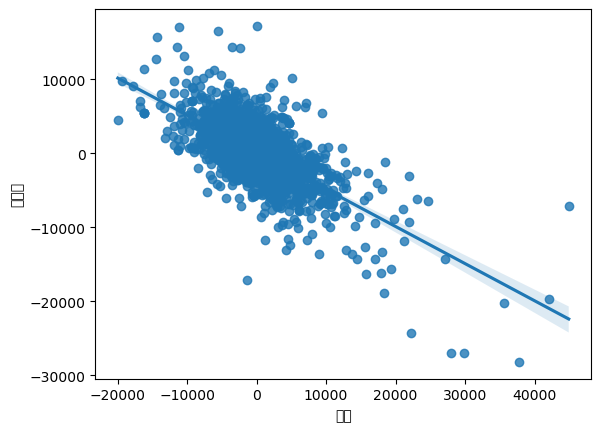

In [22]:
sns.regplot(x='개인', y='외국인', data=df)

('개인', '외국인')
('개인', '기관계')
('외국인', '기관계')


C:\Users\bigdu\AppData\Local\Temp\ipykernel_41336\1140968400.py:8: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.tight_layout()
C:\Users\bigdu\AppData\Local\Temp\ipykernel_41336\1140968400.py:8: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.tight_layout()
C:\Users\bigdu\AppData\Local\Temp\ipykernel_41336\1140968400.py:8: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from current font.
  fig.tight_layout()
C:\Users\bigdu\AppData\Local\Temp\ipykernel_41336\1140968400.py:8: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.tight_layout()
C:\Users\bigdu\AppData\Local\Temp\ipykernel_41336\1140968400.py:8: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.tight_layout()
C:\Users\bigdu\AppData\Local\Temp\ipykernel_41336\1140968400.py:8: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.tight_layout()
C:\Use

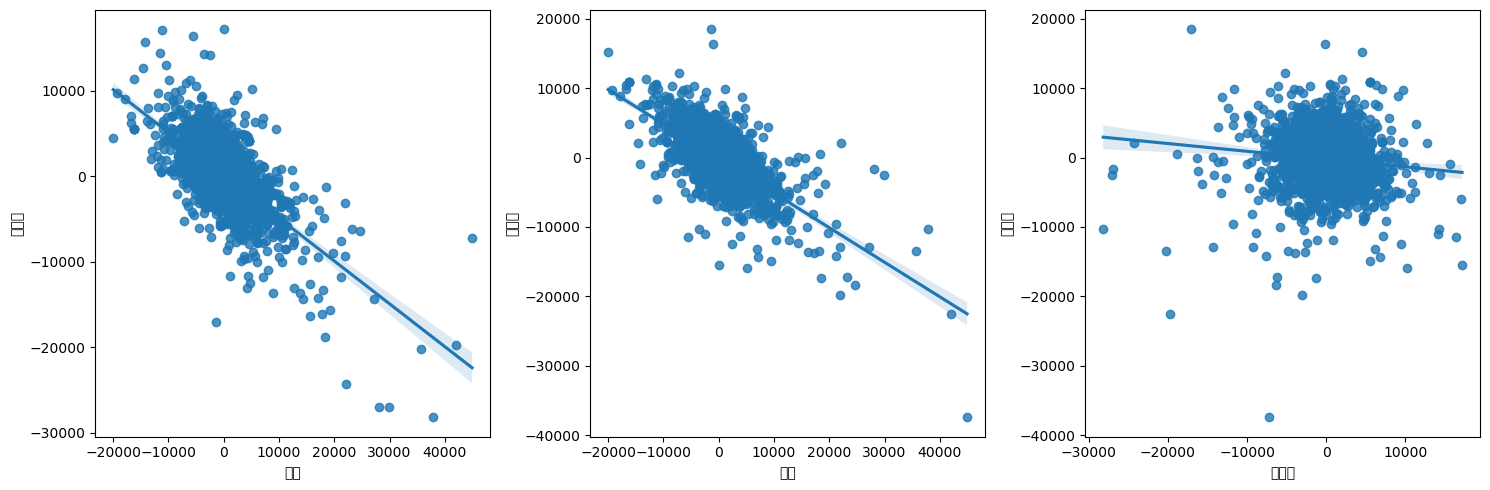

In [31]:
import itertools as it

fig, axes=plt.subplots(ncols=3)
fig.set_size_inches(15,5)
for ax, comb in zip(axes, it.combinations(['개인','외국인','기관계'],2)):
    print(comb)
    sns.regplot(df,x=comb[0],y=comb[1], ax=ax)
fig.tight_layout()